In [ ]:
!pip install tensorflow

Tesnor Demo


In [ ]:
import tensorflow as tf
x=tf.constant(10.0)
y=tf.constant(15.0)
z=x+y
print(z)

tf.Tensor(25.0, shape=(), dtype=float32)


 MNIST Character Recognition with TensorFlow

In [ ]:
#Import Libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

Load the MNIST Dataset

In [ ]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the pixel values (between 0 and 1)
X_train, X_test = X_train / 255.0, X_test / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


 Visualize the Dataset

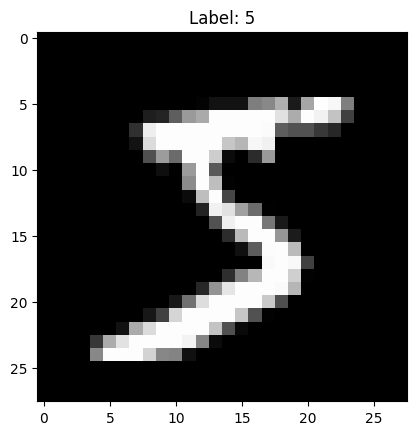

In [ ]:
# Display the first training image
plt.imshow(X_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()


Build the Neural Network Model

In [ ]:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images to 1D vector
    layers.Dense(128, activation='relu'),  # Hidden layer with 128 neurons and ReLU activation
    layers.Dropout(0.2),                   # Dropout to avoid overfitting
    layers.Dense(10, activation='softmax')  # Output layer for 10 classes (digits 0-9)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Compile the Model

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


 Train the Model

In [ ]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8647 - loss: 0.4732
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9563 - loss: 0.1505
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9678 - loss: 0.1055
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9717 - loss: 0.0915
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9764 - loss: 0.0729


Evaluate the Model

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9743 - loss: 0.0858
Test accuracy: 0.9782999753952026


Make Predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Predicted label: 7


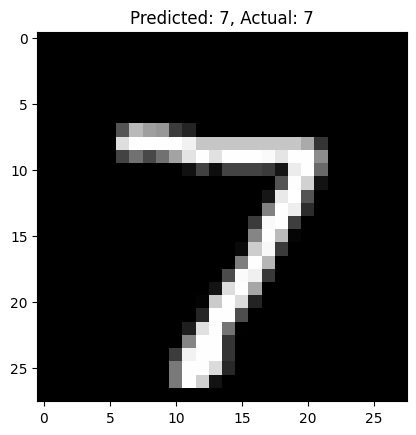

In [ ]:
# Predict the label for the first test image
predictions = model.predict(X_test)

# Get the predicted label
predicted_label = tf.argmax(predictions[0]).numpy()

print(f"Predicted label: {predicted_label}")
plt.imshow(X_test[0], cmap='gray')
plt.title(f"Predicted: {predicted_label}, Actual: {y_test[0]}")
plt.show()

Binary classifier using Convolutional Neural Network

In [1]:
#Import Required Libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Load and Prepare the Dataset

In [3]:
# Load dataset (binary classification: 0 for 'cat', 1 for 'dog')
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Filter only 'cat' (label=3) and 'dog' (label=5) classes
import numpy as np
#y_train needs to be flattened before comparison operations
y_train = y_train.flatten()
X_train_filtered = X_train[(y_train == 3) | (y_train == 5)]
y_train_filtered = y_train[(y_train == 3) | (y_train == 5)]
y_train_filtered = np.where(y_train_filtered == 3, 0, 1)  # 0 for cat, 1 for dog

#y_test needs to be flattened before comparison operations
y_test = y_test.flatten()
X_test_filtered = X_test[(y_test == 3) | (y_test == 5)]
y_test_filtered = y_test[(y_test == 3) | (y_test == 5)]
y_test_filtered = np.where(y_test_filtered == 3, 0, 1)

# Normalize the image data (pixel values from 0 to 1)
X_train_filtered, X_test_filtered = X_train_filtered / 255.0, X_test_filtered / 255.0

 Build the CNN Model

In [4]:
model = models.Sequential()

# Convolutional layer 1
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Convolutional layer 2
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Convolutional layer 3
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Fully connected layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))

# Output layer for binary classification
model.add(layers.Dense(1, activation='sigmoid'))  # Sigmoid for binary classification

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile the Model


In [5]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

 Train the Model

In [6]:
# Train the model for 10 epochs
history = model.fit(X_train_filtered, y_train_filtered, epochs=10,
                    validation_data=(X_test_filtered, y_test_filtered))

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 54ms/step - accuracy: 0.5369 - loss: 0.6820 - val_accuracy: 0.6460 - val_loss: 0.6311
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - accuracy: 0.6630 - loss: 0.6077 - val_accuracy: 0.7055 - val_loss: 0.5740
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 47ms/step - accuracy: 0.7198 - loss: 0.5500 - val_accuracy: 0.6725 - val_loss: 0.6041
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - accuracy: 0.7438 - loss: 0.5168 - val_accuracy: 0.7435 - val_loss: 0.5198
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 50ms/step - accuracy: 0.7681 - loss: 0.4722 - val_accuracy: 0.7555 - val_loss: 0.5026
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 46ms/step - accuracy: 0.7921 - loss: 0.4366 - val_accuracy: 0.7450 - val_loss: 0.5361
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 50ms/step - accuracy: 0.8054 - loss: 0.4136 - val_accuracy: 0.7650 - val_loss: 0.5027
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 52ms/step - accuracy: 0.8315 - loss: 0.3716 - 

 Evaluate the Model

In [7]:
test_loss, test_acc = model.evaluate(X_test_filtered, y_test_filtered)
print(f"Test accuracy: {test_acc}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7591 - loss: 0.5463
Test accuracy: 0.7555000185966492


Plot the Training and Validation Accuracy

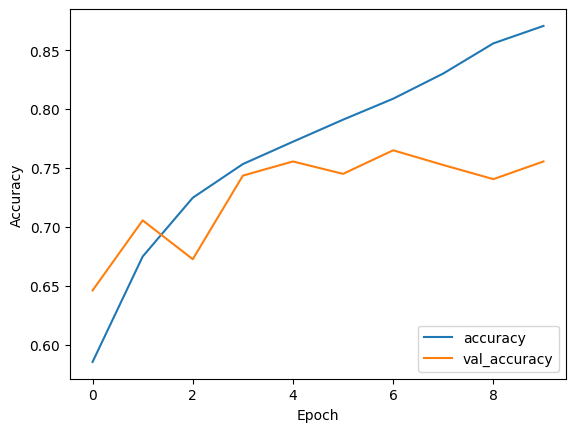

In [8]:
# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

Making Predictions

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step


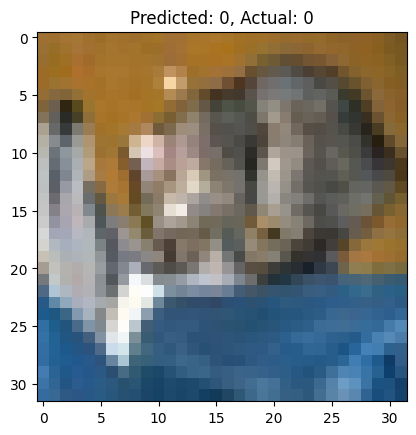

In [10]:
# Make predictions on test set
predictions = model.predict(X_test_filtered)

# Threshold to classify as either class 0 or 1
predicted_labels = (predictions > 0.5).astype("int32")

# Visualize the first prediction
plt.imshow(X_test_filtered[0])
plt.title(f"Predicted: {predicted_labels[0][0]}, Actual: {y_test_filtered[0]}")
plt.show()